## This project aims to predict the California housing price 
This is one of the full end-to-end project I worked on, in my free time to build my profile as a Data Scientist. The project is part of the book "Hands-on machine learning with sk-learn and tensorflow" and give a lot of information in a concise form. I describe here my learning and finding from this interesting read as well as apply my years of experience from my academic data analysis. 



## Data Scientist Checklist 
For any given project one needs a checklist, a common checklist is following which keep changing based on the scope of problem, but the minimal version remains the same. 

1. Frame the problem and get a grasp of the big pictue. 
2. Get the data 
3. Exploratory data analysis and gain insights. 
4. Prepare data to extract the features hidden in the data, Feature enginnering. 
5. Short list (and explore them) the possible models which can be tried on the given model, based on the knowledge gain from insights. 
6. Finetune these models and combine into a reliable and the best solution. 
7. Presentation of the solution 
8. Launch, monitor and maintain the system, it will evolve with time as more data arrive. 


### 1. Frame the problem 
As said, we have the housing dataset for California and we want to build the a model which can predict the price of house given other features of the dataset. So broadly, this is a supervised learning problem, where we will predict the price of the house, i.e. we need to use the regression algorithm. The dataset has many features like, loaction, age of house, rooms, population, income etc, all of these influence the price of house and hence this is  a multivariate regression problem to be solved. 

We are given that the existing solution do exist to predict the housing price, using some manual, time expensive and budget expensive and comes with an error of 15%. 

#### Performance metric 
##### 1. RMSE (Root Mean Square Error) 

One of the most commonly used metric for regression problem is RMSE (Root Mean Square Error). 

$ RMSE  = \sqrt (\frac{1}{m} \sum_{i=1}^{m} (h(x^{i}) - y^{i})^{2} ) $

where, 
- m: number of instance/row on which performance (RMSE) is measured
- $x^{i}$: Vector of all the input feature values (EXCLUDING OUTPUT) of $i^{th}$ instance in the data, and $y^{i}$ is the label of this vactor, or true value of the feature to be predicted, housing price in this case. 
- $h(x^{i})$: Predicted value given the input features $x^{i}$

[RMSE using sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)  

##### 2. MAE (Mean Average Error) 
MAE is another metric used for the regression problems, specially when there are known outliers in the dataset. 
In such cases it is better to average out the errors using MAE: 

$MAE = \frac{1}{m} \sum_{i=1}^{m} |(h(x^{i}) - y^{i} |$

[MAE using sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)

##### 3. $R^{2} score$
Another important metric for regression exercise is $R^{2}$ score, also called coefficient of determination. It represents the proportion of variance (of y) that has been explained by the independent variables in the model. 
It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. 

$R^{2} score (h(x^{i}),  y^{i} )$ = 1 - $\frac{\sum_{i=1}^{m} y^{i} - h(x^{i})}{ \sum_{i=1}^{m}y^{i}-\bar{y}}$
where $\bar{y}$ is the mean of true values of y OR $h(x^{i})$. 

[$R^2 score$ in sklean](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination)

So depending on the type of problem one should choose the metric appropriately. 

### 2. Get the data 

The original dataset mentioned in the book is from *StatLib repository*. 

A similar dataset is freely available at the [Kaggle dataset](https://www.kaggle.com/camnugent/california-housing-prices) repository and has been used for this modelling. 



#### Import libraries 

In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
from sklearn.model_selection import StratifiedShuffleSplit 

#### Load the dataset 

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Features 
There are 10 columns in the data, namely, 

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea




### 3. Exploratory data analysis and insights gain

In [3]:
df.info() ## provides the information of the datatype of each column in the dataframe. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above information shows that there are some missing information in the total_bedrooms column, and there it has to be taken care of before feeding this data to any machine learning algorithm. It can be treated via: 
1. By remove those 207 enteries as this is an important feature to predict the price of the house,
2. however it can be coorelated with total_rooms which is available, hence the value can be kepts as median of the house with same number of total_rooms. 
<font color='red'>Let's deal with this a bit later in the notebook. </font>


All the columns are type float64, i.e. numeric data however ocean_proximity is of type object. We saw in the df.head() that it is of string type. Let

In [4]:
df.ocean_proximity.unique(), df.ocean_proximity.unique().shape, df.ocean_proximity.value_counts()

(array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
       dtype=object),
 (5,),
 <1H OCEAN     9136
 INLAND        6551
 NEAR OCEAN    2658
 NEAR BAY      2290
 ISLAND           5
 Name: ocean_proximity, dtype: int64)

It can be noticed that there are 5 categories in which data is divided, ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], and <1H OCEAN is the most populated cateogory. 

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In order to gain more insight into the data, we can see the histogramming of all the variables, one easy way is to use seaborn library or to use the dataframe.hist function which under the hood uses matplolib. hist function will automatically histogram all the numerical features in the dataframe. 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

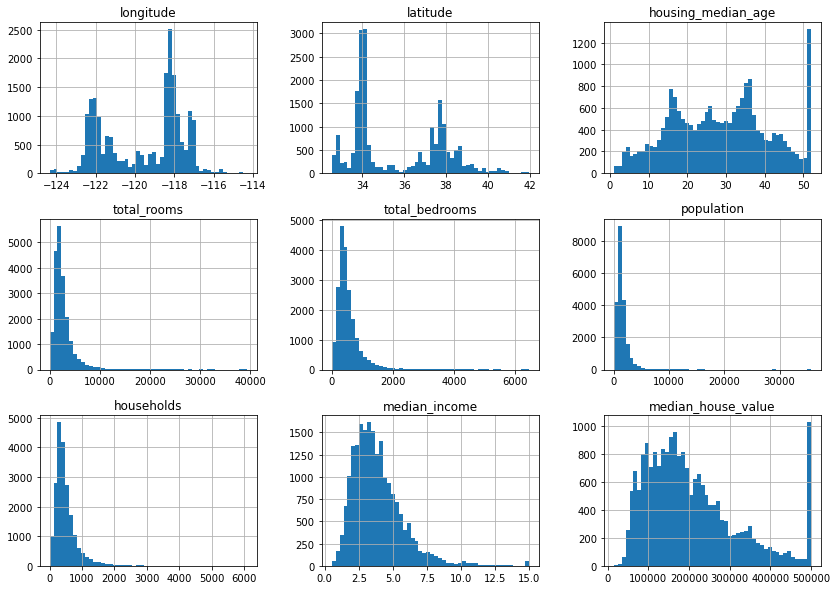

In [6]:
%matplotlib inline 
df.hist(bins=50, figsize=(14,10))

#### Insights from dataset: 
1. The housing_median_age has a peak in the last bin, i.e. 50. The value of the age has been capped to 50. 
2. The salary is given in the scale of 0-15, It is definitely not in USD, this has been scaled. 
3. Another feature is that, the salary has been capped at 15, that is the reason we see small peak at 15 and there is deserted area just between 13-15. 
4. The outcome, median_house_value is also capped at USD 500000, this is not nice for the problem as this is the feature we want to predict and it has been capped to a given number. This is another feature which has to be taken into account while feeding the data to ML algorithm. 
5. <font color='red'>  Many histograms have long tail on the right, it can be a problem for many ML algorithm, and this can be fixed by transforming the features into bell shaped distribution. </font>

#### Train and test data split 

Before we go further looking at the data, this is the best time to set aside a part of data for testing. We haven't checked much details of the data yet but it is suitable to set aside test data as our mind is a great pattern recognition system and we might spot some pattern in the test dataset which will drive the decision to choose the model later on. This situation will lead to optimistic results on test data (while estimating the generalised errors) but the results on the unseen new data will not be as good as expected from test dataset. This is called *data snooping bias*. 

##### 1. Random splitting the data: 
Creating a test set theoritically is very simple, just pick 20% of the instances randomly and set them aside. If we split the dataset into test and train randomly, but if we run the program again we will have a different set of test instances, and over the time we will see the full dataset, and this is what we want to avoid. Therefore, it is the best practise to keep the random number state fixed (say 42). So it will always generated the same shuffeled indices for test and train splitting. One of the method available in the sklean is train_test_split which does this jobs in one line. This split the dataset randomly (and consistenly same set of indices everytime using random_state argument) and it has possibility to send multiple datasets with same number of rows. 
 
 
 <font color="red"> Note: However this method breaks when we are continuously updating the data. In that situation an unique instance (row) identifier is needed to decide whether or not a given instance will enter the test dataset. E.g. if we compute hash of each instance's identifier and keep only the last byte (i.e. 8 bits, it can store  number upto 255, i.e. 256 values). Now if we put a condition that the instance will enter the test set if this byte is $<$ 51 then it is almost 20% of 256. This will ensure that the test set will remain consistent accross multiple runs even if the dataset is updated. </font>  
    
##### 2. Stratified Shuffle split 
 
The random sampling is generally fine if the dataset is large enough which is not always the case. But if the dataset is not large enough we run into the risk of *sampling bias*. 
 
<font color="green"> Example: Suppose a company want to take a survey of 1000 people in US and ask a few question. Now it is given that the male/female % in US is about 48.7/51.3%. To conduct the survey the company must ensure that the sample population is good representative of the whole population. Here I talk about only one parameter of the population, i.e. gender ratio. It should be ensured that out of 1000 people approximately 513 are female and 897 are male. This method to do the sampling is called *stratified sampling*. the sample population, and the population is divided into homogeneous subgroups called *strata*. If they use purely random sampling then there is 12% chance of smapling a skewed test set with either less than 49% female or more than 54% female. And in either way the survey result will be significantly biased.  </font>
 

Coming back to the original problem of test set for the housing dataset. We know that the median income is an important parameter which drives the median housing price. Therefore in this case it is important to make sure that the test set is good representative of the various categories of income of the whole dataset. Unlike the example above, income here is a continuous variable and hence to have a stratified sampling we need to first convert this feature into a categorical one and then do the stratified splitting. It is important to have sufficienct number of instances (row) in the dataset for each stratum, or else the estimate of the stratum's importance may be biased. This also means the number of stratum should not be too many and each stratum should have large number of instances. 

It is clear from the histogram below, that the median_income is b/w 2-5 for most of the instances, but there are instances with income way beyond 10. So in order to limit the number of stratum we divide the income by 1.5 and then clip it to a maximum value of 5. This is saved as another feature "income_category". We can use this new feature as a strata to do the stratified sampling. 




<AxesSubplot:>

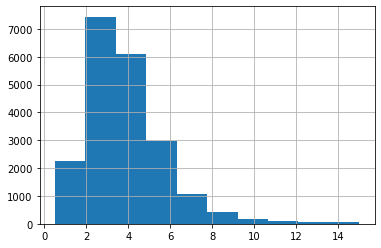

In [7]:
df.median_income.hist()

<AxesSubplot:>

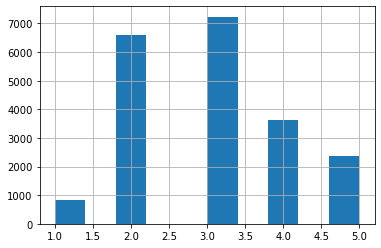

In [8]:
df["income_category"] = np.ceil (df.median_income/1.5)
df['income_category'] = df["income_category"].where(df.income_category<5, 5.0)
df["income_category"].hist()

In [9]:
split = StratifiedShuffleSplit (n_splits=1, 
                       test_size=0.2,
                       random_state=42)



In [10]:
for train_idx, test_idx in  split.split(df, df['income_category']):
    strat_train = df.loc[train_idx]
    strat_test  = df.loc[test_idx]


In [11]:
print ("income cat distribution for training sample")
strat_train.income_category.value_counts()/strat_train.size

income cat distribution for training sample


3.0    0.031872
2.0    0.028987
4.0    0.016027
5.0    0.010400
1.0    0.003623
Name: income_category, dtype: float64

In [12]:
print ("income cat distribution for test sample")
strat_test.income_category.value_counts()/strat_test.size

income cat distribution for test sample


3.0    0.031867
2.0    0.028982
4.0    0.016032
5.0    0.010417
1.0    0.003612
Name: income_category, dtype: float64

**It clearly shows that the test set if a good representative of the whole sample as each stratum of strata has similar distribution in test and training set.** The newly added feature is no longer needed now, so lets remove it, 

In [13]:
for strat in strat_train, strat_test: 
    strat.drop(["income_category"],axis=1, inplace=True)

In [80]:
## make a copy of the dataframe for later usage 
strat_train_copy = strat_train.copy()

### Data Visualisation
Let's see the geographical data using various options and see what insight we can get from this.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

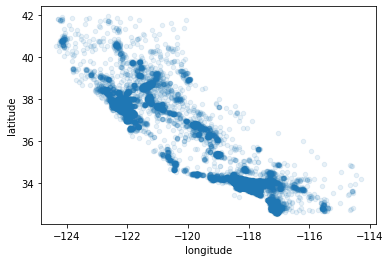

In [14]:
strat_train.plot(kind='scatter',x="longitude",y="latitude",alpha=0.1) # darker the color higher the density of data points in that region. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

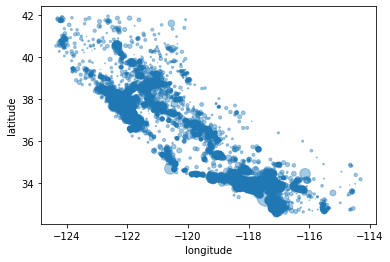

In [15]:
strat_train.plot(kind='scatter',x="longitude",y="latitude",
                 s=strat_train.population/100, ## size of bubble represent the population/100. 
                 alpha=0.4) 

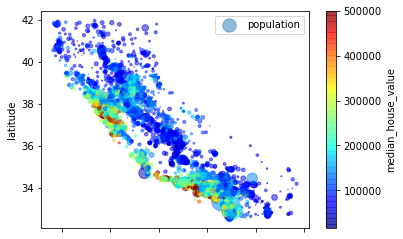

In [16]:
strat_train.plot(kind='scatter',x="longitude",y="latitude",
                 s=strat_train.population/100, ## size of bubble represent the population/100. 
                 c="median_house_value", ## color represent the value
                 colorbar=True,
                 label="population",
                 cmap=plt.get_cmap("jet"), ## this os to set the color pallete, without this it will be grey scale. 
                 alpha=0.5) 
plt.legend()

**This color map, shows that the price is dependent on:**

**1. population of the place**

**2. location, close to the sea.**

Let's look for coorelations in the training dataset. 
#### Coorelation in features 


In [17]:
strat_train.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='population', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='households', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='population', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='households', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='population'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='population'>,

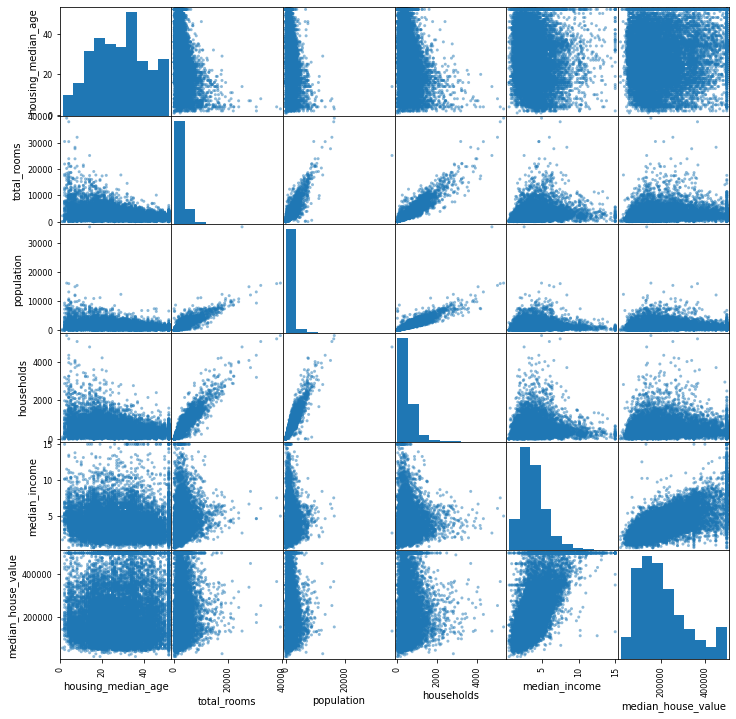

In [18]:
vars=['housing_median_age', 'total_rooms', 'population','households', 'median_income',
       'median_house_value']
scatter_matrix(strat_train[vars],
              figsize=(12,12))

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

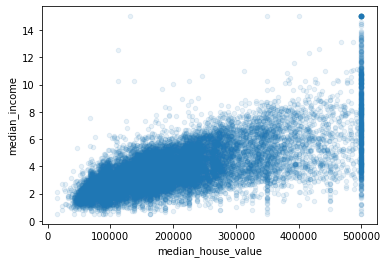

In [19]:
strat_train.plot(kind='scatter',x='median_house_value',y='median_income',
                 alpha=0.1
                )

##### Observations: 
1. I looked at the most important feature and it seems that there is some vertical line structure visible at 50K, 48K, 35K and may be more hidden in the bulk of the distribution 
2. there is strong coorelation between these to features. 

<font color='red'> We may need to clean up the features observed at median_house_price mentioned in bullet 1. Otherwise the model may learn from these absurd features and create problems. </font>

Let's try to experiment with the features and make new features which might be useful for the model. 

### Feature Engineering 

In [20]:
strat_train["rooms_per_hh"] = (strat_train.total_rooms/strat_train.households)
strat_train["BR_per_rooms"] = (strat_train.total_bedrooms/strat_train.total_rooms)
strat_train["pop_per_hh"]   = (strat_train.population/strat_train.households)

In [21]:
strat_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_hh', 'BR_per_rooms',
       'pop_per_hh'],
      dtype='object')

In [22]:
strat_train.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
rooms_per_hh          0.146285
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
pop_per_hh           -0.021985
population           -0.026920
longitude            -0.047432
latitude             -0.142724
BR_per_rooms         -0.259984
Name: median_house_value, dtype: float64

**BRAVO!!**  <font color='green'> It seems that we found another variable which is highly coorelated with the house_value, i.e. BR_per_rooms. Apperently, house with lower bedroom/room ratio tend to be more expensive. </font>

### 5. Model selection 
House price prediction data does show that the dependent and independent variables have linear coorelation between them. We showed this in the scatter_matrix plots also, and the values printed from corr() [linear coorelation b/w two variables] also shows some of the features are highly correlated with median_house_value. Therefore, **multivariate linear regression** is the first thing we can try to model this data. **Simple and lucid.**


#### Data Cleaning 
As a first step we need to clean the data, as mentioned in the notes above, we do have a few unwanted features in the dataset which we don't want the model to learn from and bias the prediction. 
Here I used the sklearn imputer to put median values in place of missing values. In order to do this, I first remove the categorical feature and then fit the numerical data and transform to get the missing values in the numerical dataset and finally convert to a datafram, like the original but no missing values anymore. 

Note that I used all the features for fit, transform to ensure that NULL values in the new dataset are also replaced with same technique (even if it happens in some other column). 



In [23]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer (strategy="median")
strat_train_num = strat_train.drop(["ocean_proximity"],axis=1)
imputer.fit(strat_train_num)
imputer.statistics_   ## will give same result as strat_train_num.median().values
X=imputer.transform(strat_train_num)
strat_train_num_transformed = pd.DataFrame(X,columns=strat_train_num.columns)

#strat_train["total_bedrooms"].fillna(median)

In [24]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
house_cat_encoded = encoder.fit_transform(strat_train["ocean_proximity"])
print (encoder.classes_)
house_cat_encoded
## In order to avoid the problem for model to learn from the feature that the value 5 
##is far from ocean and 0 is close to ocean, we need to either use OneHotEncoding on top 
##of this or use the pandas get_dummies


['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([0, 0, 4, ..., 1, 0, 3])

In [25]:
pd.get_dummies(strat_train.ocean_proximity).shape

(16512, 5)

In [45]:
strat_train_num_transformed.set_index(strat_train.index,inplace=True)

In [74]:
df_train = pd.concat ( [strat_train_num_transformed, pd.get_dummies(strat_train.ocean_proximity)],
                      axis=1
        
                     )


In [76]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_hh', 'BR_per_rooms', 'pop_per_hh',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

#### Feature Scaling 

In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = pd.DataFrame(  scaler.transform(df_train),
                               index=df_train.index,
                               columns=df_train.columns)


In [112]:
df_train_scaled.drop(["median_house_value"],axis=1, inplace=True)

### Train the model 

In [130]:
from sklearn.linear_model import LinearRegression 
regr  = LinearRegression()
regr.fit(df_train_scaled,df_train.median_house_value)
#regr.predict
df_val = df_train_scaled.iloc[1:10000]
y_val  = regr.predict(df_val)
y_true = df_train.median_house_value.iloc[1:10000]


In [131]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true, y_val))

68625.47753621929

#### Conclusion: 
When tested on 10000 instances (training) it turns out that the error in prediction is >USD 68K, which is a big error on this estimate. 

Two reasons for this: 
1. The dataset does not have enough information to let the model predict the median_housing price 
2. The model is very weak, and we can use a powerful model, 

### Next
In the next notebook: 
1. I use the transformer and pipelines to automate most of the data preprocessing step and model itself to make the life easier. 
2. Exploit different models which can be used for regression and run on test dataset using the best mode. 

